##  Supuestos básicos del modelo lineal

Los modelos lineales necesitan que las variables independientes X cumplan con ciertas condiciones, para poder predecir o explicar Y, la variable dependiente: 

- Hay una relación lineal entre X y la variable de respuesta (target) Y.
- Las variables independientes en X están normalmente distribuidas.
- No hay (o si existe, es poca) co-linealidad entre las variables independientes
- Homoscedasticidad (homogeneidad en la varianza de X)

Ejemplos de modelos lineales:

- Regresión Lineal y Logística  
- Análisis Lineal Discriminante (LDA por sus siglas en inglés Linear Discriminant Analysis)
- Regresión del componente principal (Principal Component Regression)

### Definiciones:

La **Relación lineal** describe una relación entre las variables independientes X y la variable dependiente Y de la siguiente forma:
Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

**Normalidad** significa que cada variable X tiene una distribución normal.

**Multi-colinealidad** es una fuerte correlación entre variables explicativas del modelo. No deben existir interacciones (correlaciones) entre las variables del modelo.

**Homoscedasticidad**, también se conoce como la homogeneidad de la varianza. Se dice que un modelo predictivo presenta homoscedasticidad cuando la varianza del error (esto es, el “ruido” o distorsión aleatoria que sucede entre la variable independiente X y la variable dependiente Y) es constante a lo largo de las observaciones de las variables explicativas.

**Si alguna de las condiciones no se cumple, el desempeño del modelo puede que decaiga considerablemente**. Si las condiciones no se cumplen, podemos ensayar con varios modelos de machine learning o transformar las variables de entrada de manera que cumplan con los supuestos requeridos.


### Cómo podemos evaluar si se cumplen los supuestos acerca de las variables?

- Una relación lineal puede ser evaluada con un gráfico de dispersión (scatter-plots) o gráficas residuales
- Las distribuciones normales pueden ser examinadas con gráficas Q-Q 
- La multi-colinealidad puede ser evaluada con matrices de correlación.
- La homoscedasticidad puede ser examinada con gráficas residuales


### Qué podemos hacer si las condiciones no se cumplen?

En algunas ocasiones, transformar las variables puede ayudar a que cumplan con las restricciones de los modelos lineales. Usualmente:

- Transformaciones matemáticas de las variables 
- Discretización 

**Cubriremos las transformaciones matemáticas y discretización en las futuras secciones del curso**. 


## En este demo...

Vas a aprender cómo usar:
- Gráficas de dispersión y residuales para visualizar relaciones lineales
- Gráficos Q-Q para evaluar normalidad
- Matrices de correlación para determinar co-linealidad
- Gráficas residuales para Homoscedasticidad

Vamos a comparar los resultados usando dos tipos de datos: primero usando datos simulados que cumplen con todas las condiciones requeridas en los modelos lineales y segundo, usando un conjunto de datos de Scikit-learn. Los datos simulados servirán para mostrarnos como deberían ser las gráficas en condiciones ideales.


In [52]:
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Q-Q plots
import pylab
import scipy.stats as stats

# Conjunto de datos
from sklearn.datasets import load_boston

# Para la regresión linear
from sklearn.linear_model import LinearRegression

# para separar y estandarizar los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# para evaluar modelos
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

In [53]:
# Cargar los datos: Boston House price de sklearn
boston_dataset = load_boston()

# crear un dataframe con las variables independientes
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# anadir el target - variable de respuesta
boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
# capture las variables independientes en una lista
features = boston_dataset.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [55]:
# Primero exploremos los datos 

# el objetivo es predecir el "Valor medio de las casas"
# la columna MEDV en los datos

# adicionalmente tenemos variables con información acerca de 
# las casas y de los sectores / barrios 
# a continuación las definiciones

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Datos de simulación para los ejemplos

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

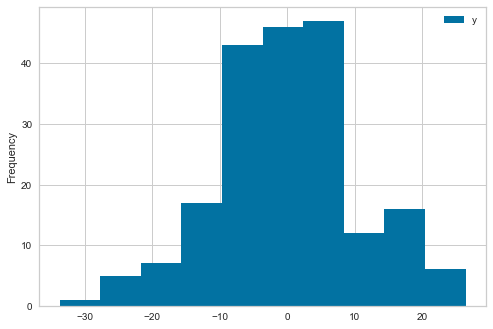

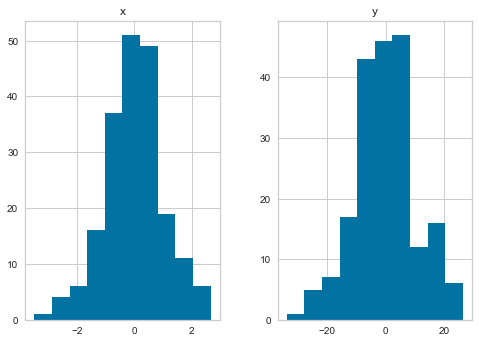

In [56]:
# Creemos un datafame con una variable X que
# tenga una distribución  normal y 
# una relación linear con Y

# Esto nos permitirá generar las gráficas 
# ideales, donde todas las condiciones se cumplen

np.random.seed(29) # por reproducibilidad

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()
toy_df.plot(x ='x', y='y', kind = 'hist')
toy_df.hist()

## Linearidad

Esto se puede apreciar sencillamente si generamos una gráfica de dispersión y residuos.

### Gráfica de dispersión plots

Text(0.5, 8.959999999999994, 'Variable independiente')

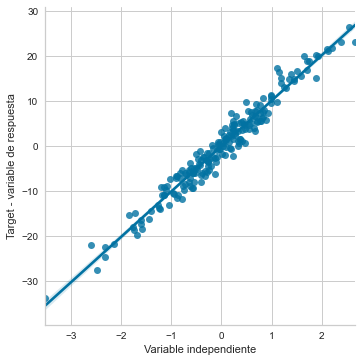

In [57]:
# Usando los datos de la simulación

# Si hay una fuerte relación lineal, 
# la gráfica resultante es similar a la 
# siguiente

sns.lmplot(x="x", y="y", data=toy_df, order=1)
# order 1 indica que queremos que seaborn
# estime un modelo lineal (la línea en la gráfica debajo)
# entre X y Y

plt.ylabel('Target - variable de respuesta')
plt.xlabel('Variable independiente')

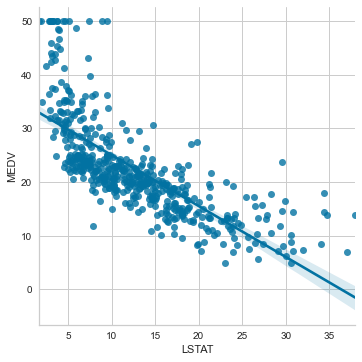

In [58]:
# Gráfico de dispersión para el Boston Dataset.

# Grafiquemos LAST (% lower status of the population - población con menos status)
# vs MEDV (median value of the house - el valor medio de la casa)

sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

La relación entre LSTAT y MEDV es en general linear; solo hay unos pocos puntos alrededor de los valores mínimos de LSTAT que no están linealmente relacionados con MEDV, hacia la esquina superior izquierda de la gráfica.

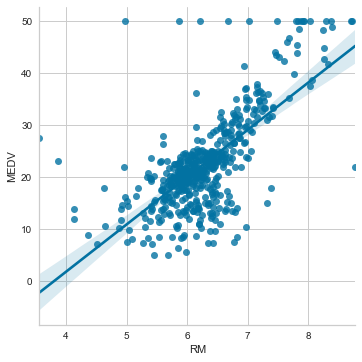

In [59]:
# Grafica de RM ( número promedio de habitaciones por inmueble)
# vs MEDV (median value of the house)

sns.lmplot(x="RM", y="MEDV", data=boston, order=1)

Aquí no es claro que la relación es lineal; alrededor del centro de la gráfica el comportamiento es lineal, pero hay muchos puntos que no se ajustan a la línea, en particular a los extremos.


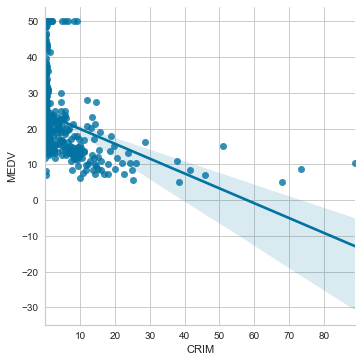

In [60]:
# Gráfica de CRIM (per capita crime rate by town - tasa de crimen per capita por ciudad)
# vs MEDV (median value of the house - el valor medio de la casa)

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

La relación entre CRIM y MEDV es claramente no lineal. En algunas ocasiones, transformando CRIM ayuda a linealizar la relación. Veamos a continuación.

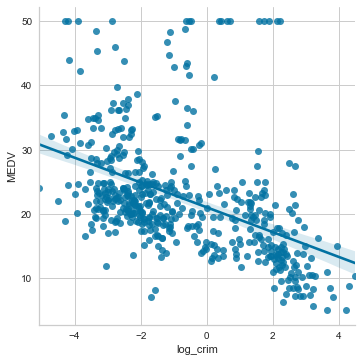

In [61]:
# Aplicar transformación logarítmica a la variable CRIM
boston['log_crim'] = np.log(boston['CRIM'])

# Gráfica de CRIM transformada vs MEDV
sns.lmplot(x="log_crim", y="MEDV", data=boston, order=1)

La transformación ciertamente mejoró el ajuste linear entre CRIM y MEDV.

In [62]:
# Eliminemos la variable transformada ya que
# no la necesitamos para el resto del demo
boston.drop(labels='log_crim', inplace=True, axis=1)

### Evaluar la relación linear examinando los residuos (errores)

Otra forma de determinar si la relación entre las variables independientes y la variable a predecir es lineal, es evaluar la distribución de los errores o residuos. Los residuos se refieren a la diferencia entre las predicciones y los valores reales de la variable a predecir. El procedimiento es el siguiente:

1) crear una regresión linear usando las variables  X 

2) obtener las predicciones

3) determinar el error (precio de la casa verdadero - el precio predicho)

4) analizar la distribución de los errores (diferencias).

Si el precio de la casa, en este caso MEDV es explicado linealmente por la variable que estamos evaluando, entonces los errores por cada observación deberían seguir una distribución normal centrada alrededor de 0.

Haremos esto, para los datos simulados (gráficas ideales), y luego haremos lo mismo para LSTAT: primero con los valores crudos y luego los transformados para comparar como la transformación afecta los residuos y el ajuste lineal.



Text(0, 0.5, 'Real value')

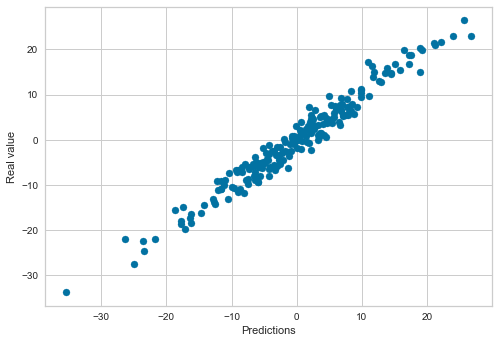

In [63]:
# SIMULACIÓN

# Paso 1: crear regresión lineal 
# usar modelo lineal de sklearn
linreg = LinearRegression()

# ajustar el modelo
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

# Paso 2: obtener las predicciones
pred = linreg.predict(toy_df['x'].to_frame())

# Paso 3: calcular los residuos (error)
error = toy_df['y'] - pred

# Gráfica predicciones vs reales 
plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

El modelo hace buenas predicciones. Las predicciones están bien alineadas con el valor real de la variable dependiente o de respuesta.

Text(0.5, 0, 'Variable Independiente x')

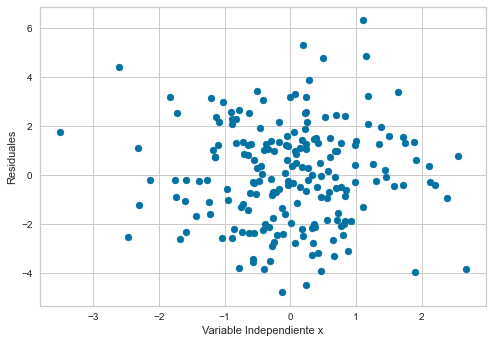

In [64]:
# Paso 4: observar la distribución de los errores

# Gráfica de residuales
# error vs variable independiente

plt.scatter(y=error, x=toy_df['x'])
plt.ylabel('Residuales')
plt.xlabel('Variable Independiente x')

Los errores estan distribuidos alrededor 0.


Text(0.5, 0, 'Residuos')

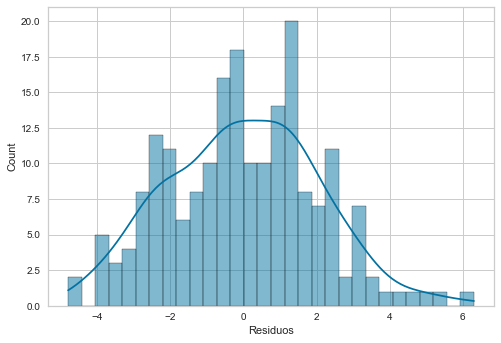

In [65]:
# Paso 4: examinar la distribución errores

# Histograma de los residuos
sns.histplot(error, bins=30, kde = True)
plt.xlabel('Residuos')

Los errores adoptan una distribución Gaussiana centrada alrededor de 0. Por lo tanto cumple con las condiciones.

Repitamos el proceso para LSTAT


Text(0, 0.5, 'MEDV')

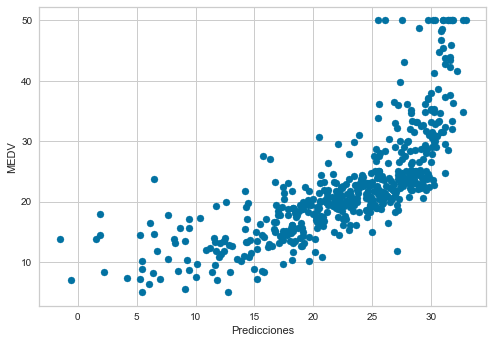

In [66]:
# Modelo lineal de sklearn
linreg = LinearRegression()

# Ajuste del model
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# Predicciones
pred = linreg.predict(boston['LSTAT'].to_frame())

# Cálculo de residuos
error = boston['MEDV'] - pred

# Gráfica predicción vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predicciones')
plt.ylabel('MEDV')

Hay un buen ajuste para la mayoría de las predicciones, pero el modelo no predice muy bien cuando los precios de las casas son altos. 

Para estos valores más altos, el modelo sub-estima el precio de las casas.


Text(0.5, 0, 'LSTAT')

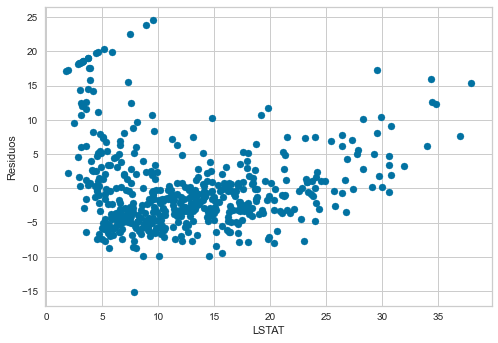

In [67]:
# Gráfica de residuales
plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuos')
plt.xlabel('LSTAT')

Los residuos no están realmente centrados alrededor de cero. Los errores no están homogéneamente distribuidos para los diferentes valores de LSTAT. En particular, para los valores bajos y altos de LSTAT, los errores son bastante altos.

Miremos si se puede mejorar.


<AxesSubplot:xlabel='MEDV', ylabel='Count'>

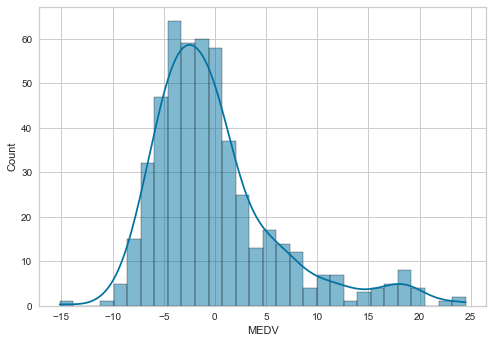

In [68]:
# Histograma de los residuos
sns.histplot(error, bins=30, kde = True)

Los residuos no están centrados alrededor de cero y la distribución no es totalmente Gaussiana. Hay un pico alrededor de 20.

Podríamos mejorar el ajuste del modelo transformando LSTAT?

Text(0, 0.5, 'MEDV')

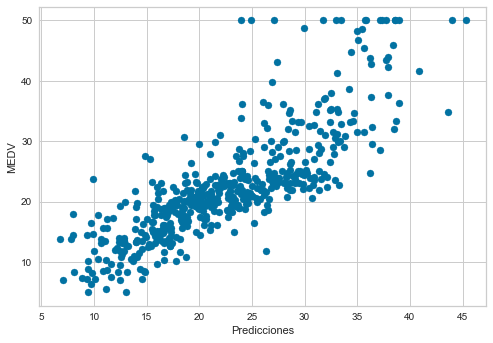

In [69]:
# Repitamos el mismo proceso pero con la
# transformación logarítmica de LSTAT

# Modelo lineal de sklearn
linreg = LinearRegression()

# Ajuste del modelo
linreg.fit(np.log(boston['LSTAT']).to_frame(), boston['MEDV'])

# Predicciones 
pred = linreg.predict(np.log(boston['LSTAT']).to_frame())

# Cálculo de los residuales
error = boston['MEDV'] - pred

# Gráfica predicciones vs real 
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predicciones')
plt.ylabel('MEDV')

Las predicciones parecen un poco mejor que cuando usamos la variable cruda sin transformar.


Text(0.5, 0, 'LSTAT')

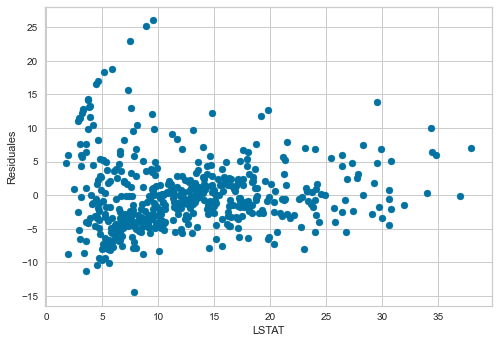

In [70]:
# Gráfica de residuales

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuales')
plt.xlabel('LSTAT')

Los errores están más centrados alrededor de cero y más homogéneamente distribuidos alrededor de los variables de X

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

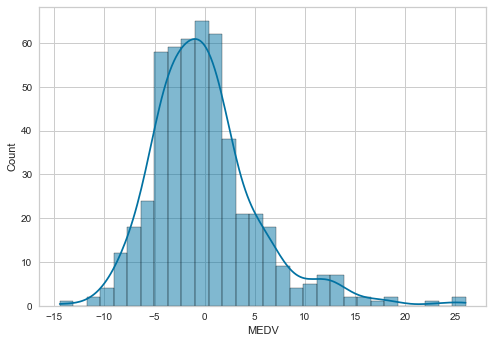

In [71]:
# Histograma de los residuales
sns.histplot(error, bins=30, kde = True)

El histograma tiene una forma un poco más Gaussiana, y el pico alrededor de 20 ha desaparecido. 

Podemos concluir que transformando la variable, mejoramos el ajuste del modelo y ayudamos a cumplir con los requerimientos del modelo lineal alrededor de linealidad.

Te invitamos a intentar lo mismo con las variables RM y CRIM!


## Multi-colinealidad

Para determinar co-linealidad, evaluamos la correlaciones de todas las variables independientes en el dataframe.


<AxesSubplot:>

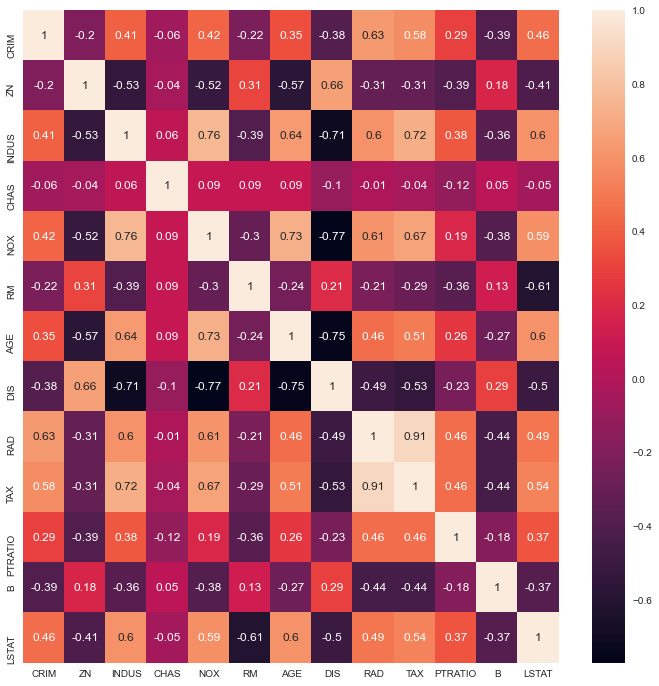

In [72]:
# Calculamos las correlaciones usando pandas corr
# redondeando los valores a 2 decimales
correlation_matrix = boston[features].corr().round(2)

# Grafiquemos la matriz de correlación usando seaborn
# annot = True para imprimir los coeficientes de correlación

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

En el eje X y Y del mapa de calor (heatmap), tenemos las variables independientes del set de datos de las casas de Boston de Sklearn. Cada cuadrado muestra el coeficiente de correlación entre las dos variables indicadas en cada eje. Por ejemplo, para LSTAT vs CRIM en la esquina inferior izquierda del mapa de calor, vemos una correlación de 0.46. Estas dos variables no están altamente correlacionadas.

Por el contrario, para las variables RAD y TAX (intenta encontrarlas en la gráfica) la correlación es de 0.91. Estas variables están bastante correlacionadas. Lo mismo es cierto para las variables, NOX y DIS, que tienen una correlación de -0.71.

Ahora podemos examinarlas en una gráfica de dispersión



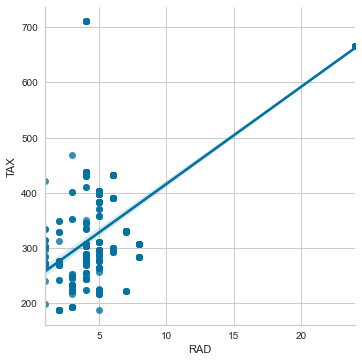

In [73]:
# correlación entre RAD (index of accessibility to radial highways - indice de accesibilidad a autopistas)
# y TAX (full-value property-tax rate per $10,000 -  valor-total tasa de impuesto-propiedad por $10,000)

sns.lmplot(x="RAD", y="TAX", data=boston, order=1)

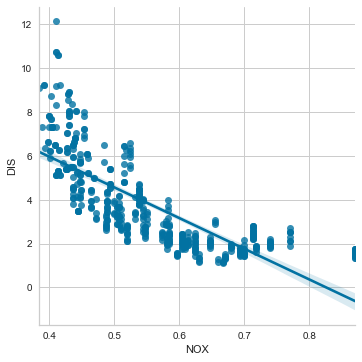

In [74]:
# y ahora NOX (nitric oxides concentration (parts per 10 million)-> concentración óxido nítrico (partes por 10 millón)  )
# y DIS (weighted distances to five Boston employment centres -> distancia ponderada a los 5 centros de Empleo en Boston)

sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

La correlación o co-linealidad entre NOX y DIS, es bastante obvia en la gráfica. Estas variables están incumpliendo la condición de no multi-colinealidad

Lo que se debe hacer es retirar una de las 2 variables de los datos, antes de entrenar el modelo lineal.


## Normalidad

Evaluamos normalidad usando histogramas y gráficas Q-Q (descritas a continuación).

Empecemos con los histogramas. Si la variable esta normalmente distribuida, su distribución tiene la forma de campana Gaussiana.

### Histograma

<AxesSubplot:xlabel='x', ylabel='Count'>

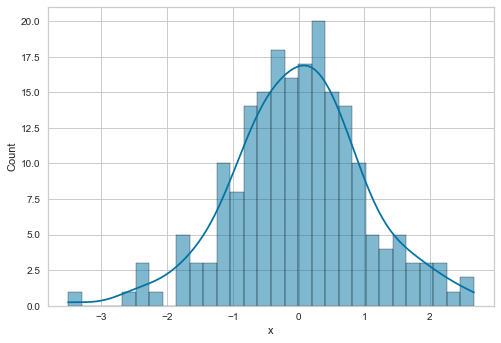

In [75]:
# histograma de la variable independiente simulada.
# (que sabemos tiene una distribución Gaussiana)
sns.histplot(toy_df['x'], bins=30, kde = True)

<AxesSubplot:xlabel='RM', ylabel='Count'>

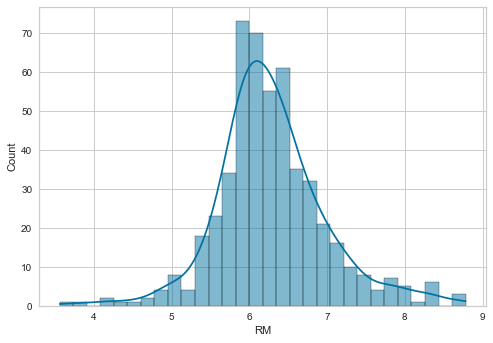

In [76]:
# histograma de la variable RM 
# (número promedio de habitaciones por inmueble)

sns.histplot(boston['RM'], bins=30, kde = True)

Esta variable parece tener una distribución Normal, cumpliendo con el supuesto de normalidad.

<AxesSubplot:xlabel='LSTAT', ylabel='Count'>

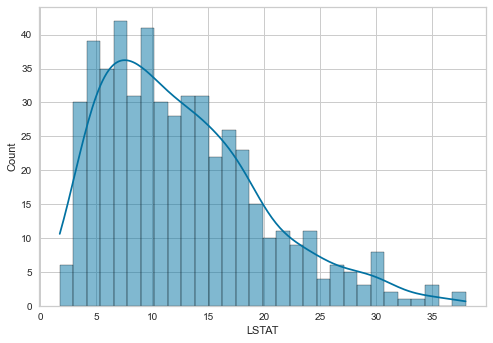

In [77]:
# histograma de la variable LSTAT

sns.histplot(boston['LSTAT'], bins=30, kde = True)

LSTAT es asimétrica. Veamos si una transformación soluciona este problema.

<AxesSubplot:xlabel='LSTAT', ylabel='Count'>

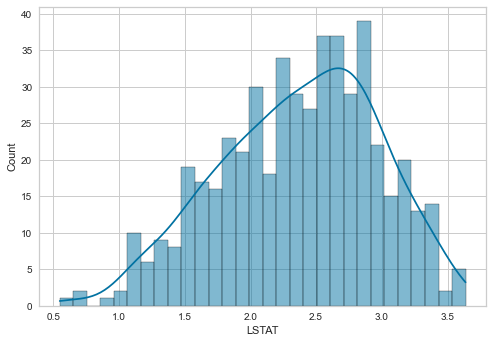

In [78]:
# histograma de LSTAT transformada con el logaritmo
sns.histplot(np.log(boston['LSTAT']), bins=30, kde = True)

La distribución es menos sesgada, pero no completamente normal. 

Podríamos intentar otras transformaciones, pero por ahora continuaremos con las gráficas Q-Q. Tenemos una sección dedicada a transformaciones más adelante en el curso.

### Gráficas Q-Q  ("Q" viene de cuantil) 

Es un método gráfico para el diagnóstico de diferencias entre la distribución de probabilidad de una población de la que se ha extraído una muestra aleatoria y una distribución usada para la comparación. 

El gráfico consiste en una serie de puntos que muestran la relación entre los cuantiles de los datos reales en el eje vertical (y) y los cuantiles de la distribución de probabilidad en el eje horizontal (x).

Si los valores de la variable coinciden perfectamente con la distribución de probabilidad especificada (distribución normal), los puntos en la gráfica tienen forma de una línea en 45 grados.


Veamos a continuación:


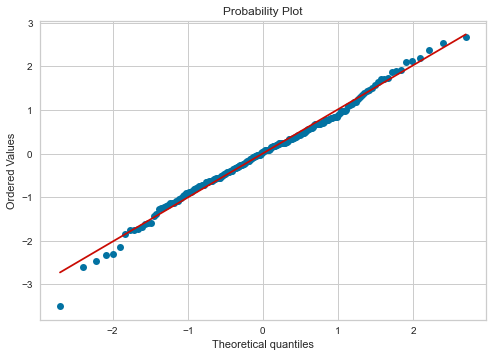

In [79]:
# Gráfico Q-Q sobre los datos simulados.

stats.probplot(toy_df['x'], dist="norm", plot=pylab)
pylab.show()

Los puntos siguen una línea de 45 grados. Así es como una distribución normal se ve en un gráfico Q-Q.

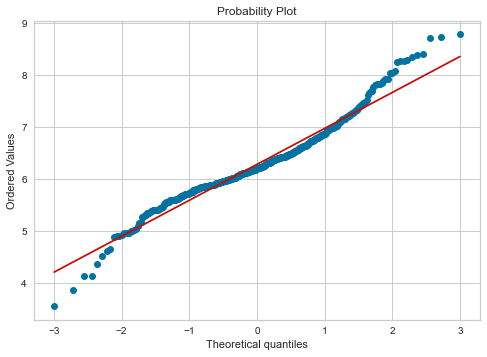

In [80]:
# Repitamos para RM
stats.probplot(boston['RM'], dist="norm", plot=pylab)
pylab.show()

La mayoría de los puntos siguen la línea de 45 grados. Sin embargo, los valores en ambos extremos de la distribución se desvían de la línea. Esto indica que la distribución de RM no es estrictamente Gaussiana.

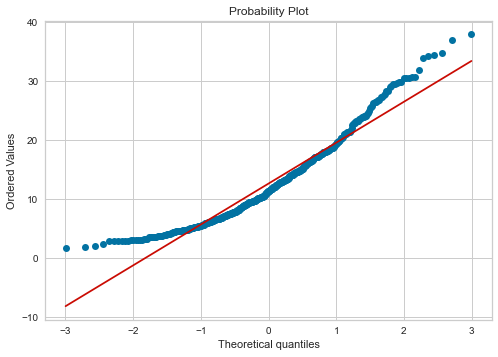

In [81]:
# y ahora para LSTAT
stats.probplot(boston['LSTAT'], dist="norm", plot=pylab)
pylab.show()

Muchas de las observaciones siguen la línea de 45 grados particularmente en el centro. Es claro que valores en la parte alta y baja del rango se desvían de la línea, lo que indica que la variable LSTAT no está normalmente distribuida, confirmando nuestros hallazgos iniciales, cuando usamos la gráfica de dispersión.


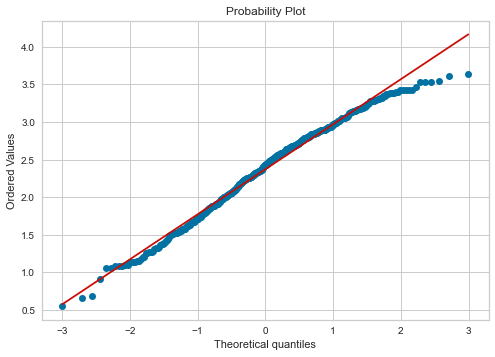

In [82]:
# Veamos si la transformación mejora la normalidad.
# usando LSTAT transformada con el logaritmo
stats.probplot(np.log(boston['LSTAT']), dist="norm", plot=pylab)
pylab.show()

Podemos ver que después de la transformación, los cuantiles están más alineados con la línea de 45, indicando una distribución más Gaussiana.


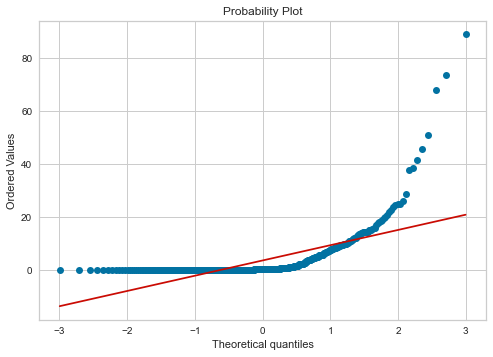

In [83]:
# Comparemos con CRIM
stats.probplot(boston['CRIM'], dist="norm", plot=pylab)
pylab.show()

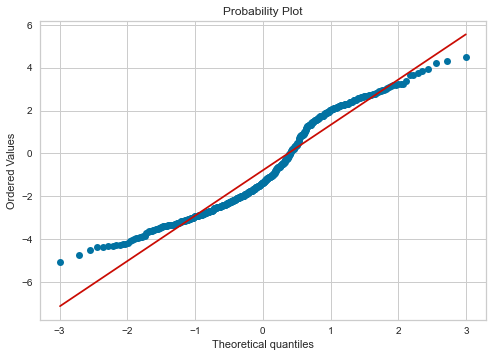

In [84]:
# veamos si la transformación mejora el ajuste
stats.probplot(np.log(boston['CRIM']), dist="norm", plot=pylab)
pylab.show()

En este caso, la transformación mejora la distribución, pero todavía la variable no es estrictamente  normal.

Estudiaremos transformaciones alternativas más adelante en el curso.


## Homoscedasticidad

Homoscedasticidad es también conocida como homogeneidad de la varianza. Se dice que un modelo predictivo presenta homoscedasticidad cuando la varianza del error (esto es, el “ruido” o distorsión aleatoria que sucede entre la variable independiente X y la variable dependiente Y ) es constante a lo largo de las observaciones de las variables explicativas.

La forma de identificar si una variable es homoscedástica, es hacer un modelo lineal con todas las variables independientes, calcular los residuales, y graficarlos vs. cada una de las variables independientes. Si la distribución de los residuales es homogénea para los valores de una variable, entonces dicha variable es homoscedástica.

Pruebas para homoscedasticidad:

- Gráfico de residuales 
- Levene’s test
- Barlett’s test
- Goldfeld-Quandt Test

Las últimas 3 pruebas están fueras del alcance de este curso.
En este demo nos concentraremos en el análisis de gráficas de residuales.

In [85]:
# entrenar y evaluar el modelo. 
# primero dividir los datos en sets de entrenamiento y prueba
# usando las variables:
# LSTAT, RM y CRIM

# usemos sklearn para dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [86]:
# Normalicemos las variables
# Detalles más adelante en el curso

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [87]:
# Construcción del modelo

# Model
linreg = LinearRegression()

# Entrenar el modelo
linreg.fit(scaler.transform(X_train), y_train)

# Hacer predicciones con los datos usados para entrenamiento 
# y calcular la suma media del cuadrado del error (mean squared error)
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Hacer predicciones con los datos de prueba 
# y calcular la suma media del cuadrado del error (mean squared error)

print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 28.603232128198893
Test set
Linear Regression mse: 33.2000629530844



Text(0, 0.5, 'Residuales')

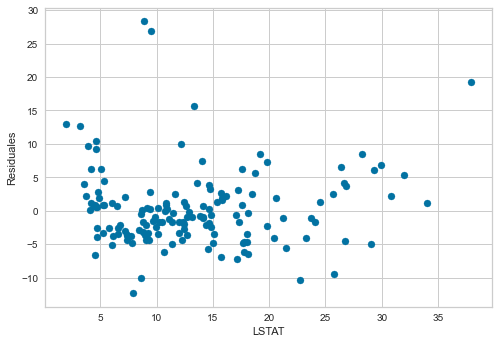

In [88]:
# Calcular los residuales
error = y_test - pred

# Graficar los residuales vs una de las variables independientes
# LSTAT en este caso

plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuales')

Los residuales están distribuidos (casi) homogéneamente para los diferentes valores de LSTAT.

Text(0, 0.5, 'Residuales')

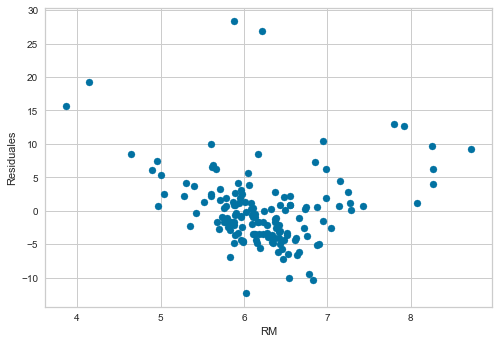

In [89]:
# Grafica residuales vs RM
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuales')

Text(0, 0.5, 'Residuales')

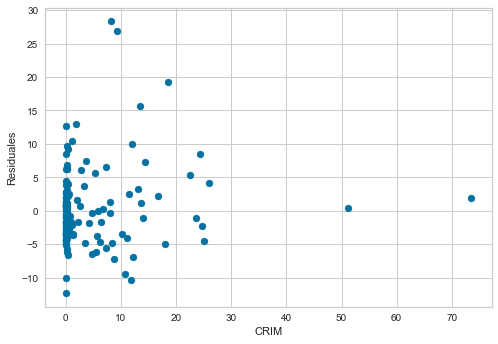

In [90]:
# Grafica residuales vs CRIM
plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuales')

Para esta variable, los residuales no parecen estar homogéneamente distribuidos para los valores de RM. De hecho, para los valores extremos de RM (bajos y altos), los residuos son más altos.

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

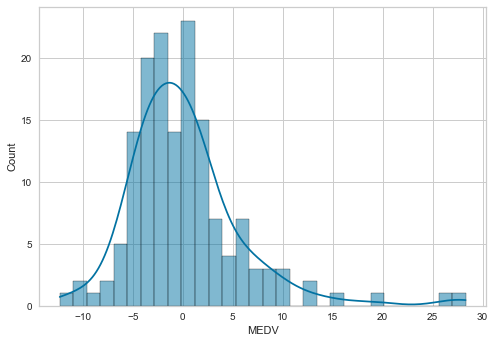

In [91]:
sns.histplot(error, bins=30, kde = True)

Vemos en el histograma, que los valores de los residuos están distribuidos casi normalmente, pero no de forma estricta, con más valores de los esperados hacia la derecha de la gráfica.

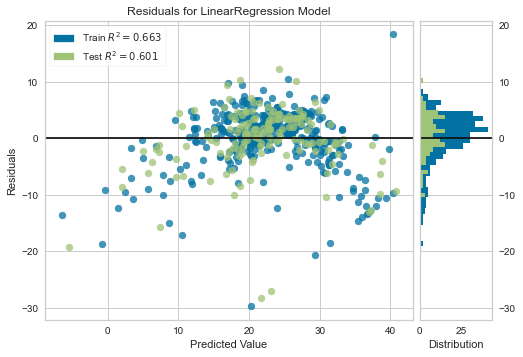

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [92]:
# En esta celda vamos a introducir la librería yellowbricks;
# utilizada para visualizar los resultados de modelos de machine 
# learning

# Si no haz instalado yellowbricks
# añade comentarios a estas celda para evitar errores al correr el código.

# yellowbricks permite visualizar los residuales de los modelos
# después de ajustar un modelo de regresión lineal

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Ajustar modelo a los datos de entrenamiento
visualizer.score(scaler.transform(X_test), y_test)  # Evaluar el modelo con los datos de prueba
visualizer.poof()

Podemos ver de la gráfica, que los residuales no están distribuidos homogéneamente para los distintos valores predichos. Tampoco están centrados alrededor de cero.

Veamos si la transformación de las variables CRIM y LSTAT ayuda a mejorar el ajuste del modelo y la homoscedasticidad.


In [93]:
# Transformamos logarítmicamente las variables
boston['LSTAT'] = np.log(boston['LSTAT'])
boston['CRIM'] = np.log(boston['CRIM'])
boston['RM'] = np.log(boston['RM'])

# Separemos datos en las muestras de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [94]:
# Normalicemos las variables 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [95]:
# Contrucción del modelo

# Modelo
linreg = LinearRegression()

# ajuste del modelo
linreg.fit(scaler.transform(X_train), y_train)

# predicciones y calculo de error 
# para datos de entrenamiento
print('Set de entrenamiento')
pred = linreg.predict(scaler.transform(X_train))
print('Regresión Lineal mse: {}'.format(mean_squared_error(y_train, pred)))

# predicciones y calculo de error 
# para datos de prueba
print('Set de prueba')
pred = linreg.predict(scaler.transform(X_test))
print('Regresión Lineal mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Set de entrenamiento
Regresión Lineal mse: 24.36853232810096
Set de prueba
Regresión Lineal mse: 29.516553315892253



Si comparamos este modelo con aquel construido sobre los datos no transformados (celdas más arriba), podemos ver que la transformación mejoró el ajuste del modelo, ya que la media de la suma del cuadrado de los errores (mse) para ambas muestras (entrenamiento y prueba) son menores cuando usamos los datos transformados.

Text(0, 0.5, 'Residuales')

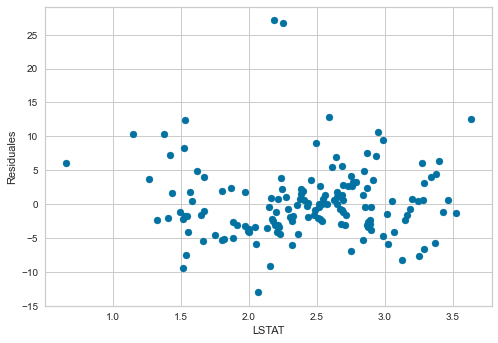

In [96]:
# calcular los residuales
error = y_test - pred

# Gráfica de residuales vs la variable
plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuales')

Los residuos parecen estar distribuidos homogéneamente para los diferentes valores de LSTAT y centrados alrededor del cero.

Text(0, 0.5, 'Residuales')

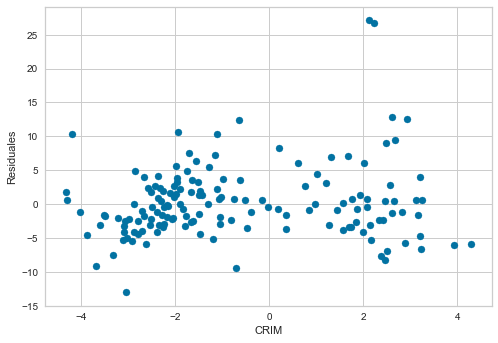

In [97]:
plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuales')

Text(0, 0.5, 'Residuales')

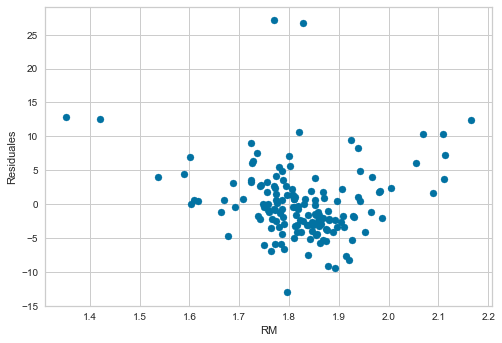

In [98]:
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuales')

Las transformaciones mejoraron la distribución de los residuales para los valores de RM.

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

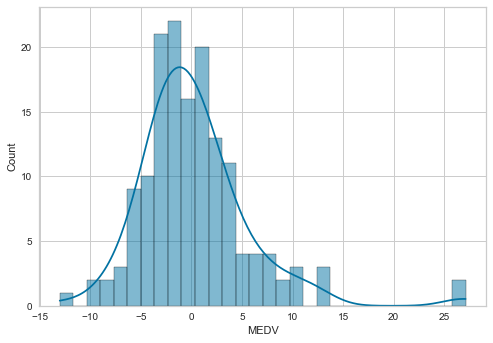

In [99]:
sns.histplot(error, bins=30, kde = True)

La distribución de los residuales tiene una forma más Gaussiana. Todavía hay algunos valores más altos que los esperados hacia la cola derecha de la distribución, pero aparte de esto, la distribución de los datos es menos sesgada que con los datos no transformados.

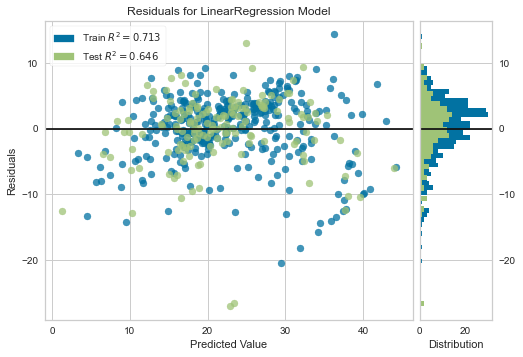

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [100]:
# Gráfica de los residuales usando yellowbricks

# recuerda comentar esta celda si no haz instalado la librería
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Ajustar modelo a los datos de entrenamiento
visualizer.score(scaler.transform(X_test), y_test)  # Evaluar el modelo con los datos de prueba
visualizer.poof()


###### Como ya observamos, los errores están más homogéneamente distribuidos a lo largo de los valores de la variable independiente, y centrados en cero.

Observa los valores de R2 en las gráficas de residuales. Compara con los valores para los modelos usando datos con y sin transformación. Podemos ver que transformando los datos, mejoro el ajuste (R2 en prueba es del 0.64 para los datos transformados vs 0.6 para los datos no-transformados.
